In [403]:
# Script to calculate gaussian beam propagation:

In [404]:
#Version 1:
# This script aims on calculating the optimal parameters to couple a beam out of the optical fiber and into the high-finesse cavity
# Concept up to now:
# Calculate waist and position of waist before the incoupling lens of the cavity
# determine the best distance between lens and cavity as well as for outcoupling lens graphically

#Version 2:
# Calculations for 780nm

#Version 3:
# Calculations for 960nm

General Section:
Import modules; define functions; define constants

In [405]:
#Import area
import numpy as np
from sympy.physics.optics import rayleigh2waist, BeamParameter, FreeSpace, CurvedRefraction, FlatRefraction, ThinLens
import sympy as sp
from sympy.plotting import plot
from sympy.utilities.lambdify import lambdify
import operator
import matplotlib.pyplot as plt
from sympy import I,re,im
from functools import reduce
#from sympy.physics.optics import BeamParameter, GeometricRay

In [406]:
def calculateBeam(p, matrix_list):
    mat = reduce(operator.mul, matrix_list[::-1], 1)  # Multiply matrices
    print(mat)
    return mat * p

def calculateBeamInv(p, matrix_list):
    matrix_list_inv = [i.inv() for i in matrix_list]
    mat = reduce(operator.mul, matrix_list_inv[::], 1)  # Multiply matrices
    print(mat)
    return mat * p

#Calculate distance z from waist w_0 if w is at current position
def calculate_z(w,w_0,r_curv,wavelength):
    return -sp.sign(r_curv)*(np.pi*w_0**2/wavelength)*((w/w_0)**2-1.0)**0.5


#Calculate beam_parameters inside cavity:
def rayleigh_length(z, r_curv_at_z):
    return sp.sqrt(z*(r_curv_at_z-z))


In [407]:
#Define important constants

um=10**(-6)
nm=10**(-9)
lambda_960=960*nm
lambda_780=780*nm
n_vac=1
n_air=1.000292 #For more exact value see Edlen1966
n_ULE_780=1.4768 #at 780nm; calculated from ULE Corning datasheet
n_ULE_960=1.4742 #at 960nm; calculated from ULE Corning datasheet
n_entrance_window=1.5
d_entrance_window=2*10**-3
angle_entrance_window=2/180*np.pi
f_incoupling_lens=0.3
d_in=sp.symbols('d_in', real=True) #d_in is the distance between the incoupling lens and the cavity window
#print(im(d_in))
d_btw_outc_cavlens_780=0.6 # s'+d_in=d_btw_outc_cavlens; s' distance lens to waist outcoupler, d_in: distance waist to cavity lens
d_btw_outc_cavlens_960=0.70 # s'+d_in=d_btw_outc_cavlens; s' distance lens to waist outcoupler, d_in: distance waist to cavity lens

# mode field diameter =2*waist
MFD_780=4.9*um
p_coupl_780=BeamParameter(lambda_780,0,w=MFD_780/2)

# mode field diameter =2*waist
MFD_960=4.9*um #4.9*um
p_coupl_960=BeamParameter(lambda_960,0,w=MFD_960/2)



Cavity Section:
Calculate beam properties of the beam that has to be coupled into the cavity starting from the properties of the cavity.

In [408]:
#Calculate the rayleigh length, which is independent of the wave length and only given by the cavity properties:
z_r=rayleigh_length(0.1,0.5)

#calculate the waist at the plane mirror:
w_0_780nm=rayleigh2waist(rayleigh_length(0.1,0.5),lambda_780)
w_0_960nm=rayleigh2waist(rayleigh_length(0.1,0.5),lambda_960)
print(w_0_780nm.n(),w_0_960nm.n())

#Define the beam parameters at the plane mirror:
p_0_780nm=BeamParameter(lambda_780,0,w=w_0_780nm).n()
p_0_960nm=BeamParameter(lambda_960,0,w=w_0_960nm).n()



0.000222837030685367 0.000247215489294841


In [409]:
#List of optical elements for 780 and 960nm because of different indices of refraction:
opt_element_list_780=[]
opt_element_list_780.append(FreeSpace(0.1))
opt_element_list_780.append(CurvedRefraction(0.5,n_vac,n_ULE_780))
opt_element_list_780.append(FreeSpace(0.25*2.54*0.01)) #Propagation in mirror medium
opt_element_list_780.append(FlatRefraction(n_ULE_780,n_vac))
opt_element_list_780.append(FreeSpace(74.15*10**(-3))) #Double check: (261mm-(100mm+2*0.25*25.4mm))/2
opt_element_list_780.append(FlatRefraction(n_vac,n_entrance_window))
opt_element_list_780.append(FreeSpace(d_entrance_window))
opt_element_list_780.append(FlatRefraction(n_entrance_window,n_vac))
opt_element_list_780.append(FreeSpace(d_in))
opt_element_list_780.append(ThinLens(f_incoupling_lens))
#opt_element_list_780.append(FreeSpace(0.9))
#opt_element_list_780.append(ThinLens(f_outcoupling))
#opt_element_list_780.append(FreeSpace(d0))
#opt_element_list_780.append()
#print(opt_element_list_780)


opt_element_list_960=[]
opt_element_list_960.append(FreeSpace(0.1))
opt_element_list_960.append(CurvedRefraction(0.5,n_vac,n_ULE_960))
opt_element_list_960.append(FreeSpace(0.25*2.54*0.01)) #Propagation in mirror medium
opt_element_list_960.append(FlatRefraction(n_ULE_960,n_vac))
opt_element_list_960.append(FreeSpace(74.15*10**(-3))) #Double check: (261mm-(100mm+2*0.25*25.4mm))/2
opt_element_list_960.append(FlatRefraction(n_vac,n_entrance_window))
opt_element_list_960.append(FreeSpace(d_entrance_window))
opt_element_list_960.append(FlatRefraction(n_entrance_window,n_vac))
opt_element_list_960.append(FreeSpace(d_in))
opt_element_list_960.append(ThinLens(f_incoupling_lens))
#opt_element_list_960.append(FreeSpace(0.9))
#opt_element_list_960.append(ThinLens(f_outcoupling))
#opt_element_list_960.append(FreeSpace(d0))
#opt_element_list_960.append()
#print(opt_element_list_960)

In [410]:
#Calculate beam_parameter for 780nm outside of the cavity:
p1_780=calculateBeam(p_0_780nm,opt_element_list_780)
#print(p1_780.radius.n())
#print(p1_780.w.n())
#print(p1_780.w_0.n())
#print(calculate_z(p1_780.w.n(),p1_780.w_0.n(),p1_780.radius.n(),lambda_780))

#Calculate beam_parameter for 960nm outside of the cavity:
p1_960=calculateBeam(p_0_960nm,opt_element_list_960)
#print(p1_960.radius.n())
#print(p1_960.w.n())
#print(p1_960.w_0.n())
#print(calculate_z(p1_960.w.n(),p1_960.w_0.n(),p1_780.radius.n(),lambda_960))

Matrix([[-0.9536*d_in + 0.923918768306248, 0.90464*d_in + 0.172175047650415], [3.17866666666667*d_in - 4.03332922768749, -3.01546666666667*d_in + 0.330723174498615]])
Matrix([[-0.9484*d_in + 0.924326448614842, 0.90516*d_in + 0.172223399168905], [3.16133333333333*d_in - 4.02948816204947, -3.0172*d_in + 0.331082002770316]])


In [411]:
#Test backwards direction:

#p_init=BeamParameter(lambda_780,-calculate_z(p1_780.w.n(),p1_780.w_0.n(),p1_780.radius.n(),lambda_780),w=p1_780.w_0.n())
#p_final=calculateBeamInv(p_init, opt_element_list)
#print(p_final.radius.n())
#print(p_final.w_0.n())
#print(calculate_z(p_final.w.n(),p_final.w_0.n(),p_final.radius.n(),lambda_780))

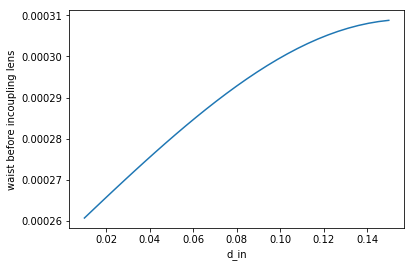

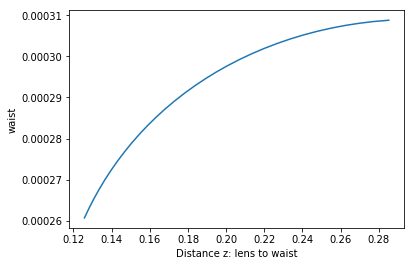

0.0002927881624951697
0.1834186489254655
0.0008479909471321368


In [412]:
#Calculate incoupling waist for 780nm in front of the incoupling lens:
waist_in_780=lambdify(d_in,p1_780.w_0,'numpy')
d_in_list=np.linspace(0.01,0.15,num=31)
#print(waist_in(d_in_list))
plt.plot(d_in_list,waist_in_780(d_in_list))
plt.xlabel('d_in')
plt.ylabel('waist before incoupling lens')
plt.show()

func_z_cav_lens_780=lambdify(d_in,calculate_z(p1_780.w.n(),p1_780.w_0.n(),p1_780.radius.n(),lambda_780),'numpy')

plt.plot(func_z_cav_lens_780(d_in_list),waist_in_780(d_in_list))
plt.xlabel('Distance z: lens to waist')
plt.ylabel('waist')
plt.show()

divergence_in_780=lambdify(d_in,p1_780.divergence,'numpy')

print(waist_in_780(0.08))
print(func_z_cav_lens_780(0.08))
print(divergence_in_780(0.08))

[0.08 0.09 0.1 ]


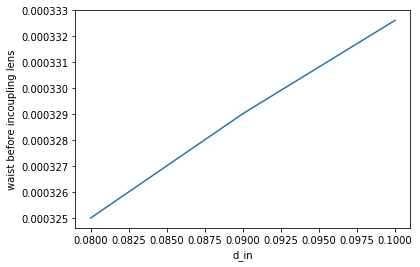

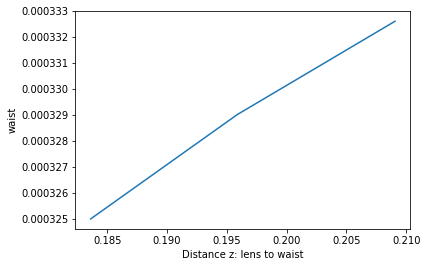

0.0003250163992676159
0.1836055337393363
0.0009401909916700199


In [413]:
#Calculate incoupling waist for 960nm in front of the incoupling lens:
waist_in_960=lambdify(d_in,p1_960.w_0,'numpy')
d_in_list=np.arange(0.08,0.11,0.01)#np.linspace(0.01,0.15,num=31)
print(d_in_list)
#print(waist_in(d_in_list))
plt.plot(d_in_list,waist_in_960(d_in_list))
plt.xlabel('d_in')
plt.ylabel('waist before incoupling lens')
plt.show()

func_z_cav_lens_960=lambdify(d_in,calculate_z(p1_960.w.n(),p1_960.w_0.n(),p1_960.radius.n(),lambda_960),'numpy')

plt.plot(func_z_cav_lens_960(d_in_list),waist_in_960(d_in_list))
plt.xlabel('Distance z: lens to waist')
plt.ylabel('waist')
plt.show()

divergence_in_960=lambdify(d_in,p1_960.divergence,'numpy')

print(waist_in_960(0.08))
print(func_z_cav_lens_960(0.08))
print(divergence_in_960(0.08))

Outcoupling Section: Calculate beam properties after the outcoupling lens

In [414]:
# Define Outcoupling Parameters:
d0_780=sp.symbols('d0_780')
f_outcoupling_780=4.51*10**-3

d0_960=sp.symbols('d0_960')
f_outcoupling_960=4.51*10**-3

In [415]:
# Calculate parameters of beam coming from outcoupling lens for 780nm
coupling_opt_list_780=[]
coupling_opt_list_780.append(FreeSpace(d0_780))
coupling_opt_list_780.append(ThinLens(f_outcoupling_780))
#coupling_opt_list_780.append(FreeSpace(f_outcoupling+t1))
#coupling_opt_list_780.append(ThinLens(t1))
#coupling_opt_list_780.append(FreeSpace(t1+t2))
#coupling_opt_list_780.append(ThinLens(t2))
#coupling_opt_list_780.append(FreeSpace(d1))
p_final_780=calculateBeam(p_coupl_780, coupling_opt_list_780)

d0_list_780=np.linspace(f_outcoupling_780,f_outcoupling_780*1.1,num=101)
func_w_0_780 = lambdify(d0_780, p_final_780.w_0,'numpy') # returns a numpy-ready function for w_0
func_z_780 = lambdify(d0_780, calculate_z(p_final_780.w,p_final_780.w_0,p_final_780.radius,lambda_780),'numpy') # returns a numpy-ready function for z
func_r_780= lambdify(d0_780, p_final_780.radius,'numpy') # returns a numpy-ready function for radius of curvature
func_div_780= lambdify(d0_780, p_final_780.divergence,'numpy') # returns a numpy-ready function for divergence
w_0_list_780 = func_w_0_780(d0_list_780)
z_list_780= func_z_780(d0_list_780)
r_list_780= func_r_780(d0_list_780)

#Test for different distances d_in between incoupling lens and cavity
print(func_w_0_780(5.035*10**-3))
print(func_z_780(5.035*10**-3))
print(func_div_780(5.035*10**-3))

Matrix([[1, d0_780], [-221.729490022173, -221.729490022173*d0_780 + 1]])
2.1024386442885193e-05
0.04317106343729809
0.011809225058616504


In [416]:
# Calculate parameters of beam coming from outcoupling lens for 960nm
coupling_opt_list_960=[]
coupling_opt_list_960.append(FreeSpace(d0_960))
coupling_opt_list_960.append(ThinLens(f_outcoupling_960))
#coupling_opt_list_780.append(FreeSpace(f_outcoupling+t1))
#coupling_opt_list_780.append(ThinLens(t1))
#coupling_opt_list_780.append(FreeSpace(t1+t2))
#coupling_opt_list_780.append(ThinLens(t2))
#coupling_opt_list_780.append(FreeSpace(d1))
p_final_960=calculateBeam(p_coupl_960, coupling_opt_list_960)

d0_list_960=np.linspace(f_outcoupling_960,f_outcoupling_960*1.1,num=101)
func_w_0_960 = lambdify(d0_960, p_final_960.w_0,'numpy') # returns a numpy-ready function for w_0
func_z_960 = lambdify(d0_960, calculate_z(p_final_960.w,p_final_960.w_0,p_final_960.radius,lambda_960),'numpy') # returns a numpy-ready function for z
func_r_960= lambdify(d0_960, p_final_960.radius,'numpy') # returns a numpy-ready function for radius of curvature
func_div_960= lambdify(d0_960, p_final_960.divergence,'numpy') # returns a numpy-ready function for divergence
w_0_list_960 = func_w_0_960(d0_list_960)
z_list_960= func_z_960(d0_list_960)
r_list_960= func_r_960(d0_list_960)

#Test for different distances d_in between incoupling lens and cavity
print(func_w_0_960(5.035*10**-3))
print(func_z_960(5.035*10**-3))
print(func_div_960(5.035*10**-3))

Matrix([[1, d0_960], [-221.729490022173, -221.729490022173*d0_960 + 1]])
2.1031950298423532e-05
0.04319888629930246
0.014529203730542464


In [417]:
#Calculate Gaussian beam properties with simpler formulae taken from "Fokussierung und opt. Abbildung in der Lasertechnik"
def w1(w0,f,s,lambda_0):
    z_r0=(np.pi*w0**2)/lambda_0
    return w0*f*sp.sqrt(1/((s-f)**2+z_r0**2))

def s1(w0,f,s,lambda_0):
    z_r0=(np.pi*w0**2)/lambda_0
    #print(z_r0)
    return f+(f**2*(s-f))/((s-f)**2+z_r0**2)

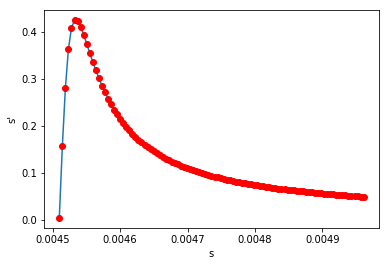

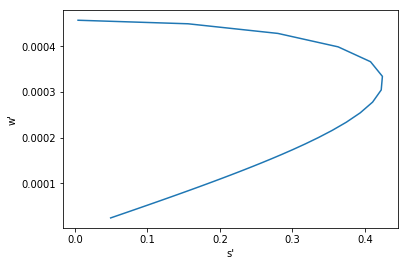

In [418]:
func_w1_780=lambdify(d0_780,w1(MFD_780/2,f_outcoupling_780,d0_780,lambda_780),'numpy')

#w1_list_simple=func_w1(d0_list)
w1_list_simple_780=[w1(MFD_780/2,f_outcoupling_780,d0_780,lambda_780) for d0_780 in d0_list_780]
s1_list_simple_780=[s1(MFD_780/2,f_outcoupling_780,d0_780,lambda_780) for d0_780 in d0_list_780]

plt.plot(d0_list_780,s1_list_simple_780)
plt.plot(d0_list_780,z_list_780,'ro')
plt.xlabel("s")
plt.ylabel("s'")
plt.show()

fig1 = plt.plot(s1_list_simple_780,w1_list_simple_780)
plt.xlabel("s'")
plt.ylabel("w'")
plt.show()

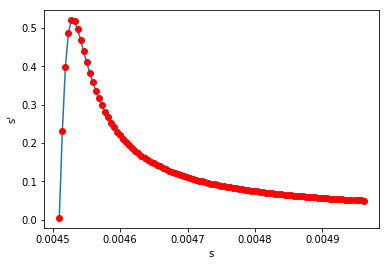

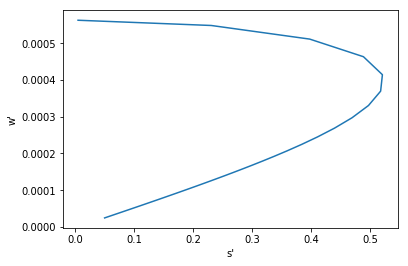

In [419]:
func_w1_960=lambdify(d0_960,w1(MFD_960/2,f_outcoupling_960,d0_960,lambda_960),'numpy')

#w1_list_simple=func_w1(d0_list)
w1_list_simple_960=[w1(MFD_960/2,f_outcoupling_960,d0_960,lambda_960) for d0_960 in d0_list_960]
s1_list_simple_960=[s1(MFD_960/2,f_outcoupling_960,d0_960,lambda_960) for d0_960 in d0_list_960]


plt.plot(d0_list_960,s1_list_simple_960)
plt.plot(d0_list_960,z_list_960,'ro')
plt.xlabel("s")
plt.ylabel("s'")
plt.show()

fig1 = plt.plot(s1_list_simple_960,w1_list_simple_960)
plt.xlabel("s'")
plt.ylabel("w'")
plt.show()

Graphically find the overlap of beam properties between the outcoupled beam and the required incoupling beam for 780nm:

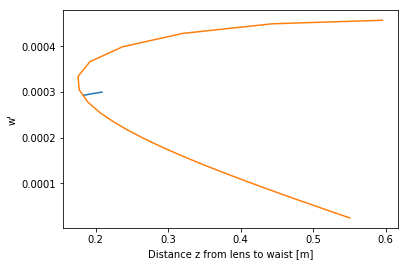

In [420]:
plt.plot(func_z_cav_lens_780(d_in_list),waist_in_780(d_in_list),label='Waist for different distand d_in between incoupling lens and cavity; 780nm')
plt.plot([d_btw_outc_cavlens_780-i for i in s1_list_simple_780],w1_list_simple_780, label='Waist for different outcoupling lengths,780nm')
plt.xlabel("Distance z from lens to waist [m]")
plt.ylabel("w'")
plt.show()

Graphically find the overlap of beam properties between the outcoupled beam and the required incoupling beam for 960nm:

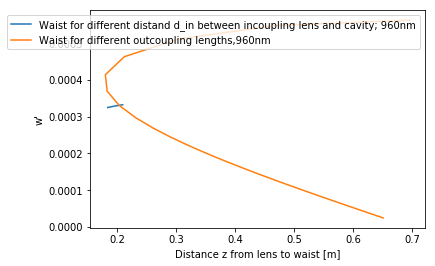

In [421]:
plt.plot(func_z_cav_lens_960(d_in_list),waist_in_960(d_in_list), label='Waist for different distand d_in between incoupling lens and cavity; 960nm')
plt.plot([d_btw_outc_cavlens_960-i for i in s1_list_simple_960],w1_list_simple_960, label='Waist for different outcoupling lengths,960nm')
plt.xlabel("Distance z from lens to waist [m]")
plt.ylabel("w'")
plt.legend()
plt.show()